<b>퍼셉트론에서 신경망으로</b>

가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

데이터에서 가중치 매개변수 값을 학습하는 방법은 다음 장에서

입력층
은닉층(사람의 눈에는 보이지 않는다.)
출력층

편향도 가중치가 b이고 입력이 1인 하나의 뉴런(노드)로 볼 수 있다.

중요한 점
뉴런의 출력값은 0과 1뿐인 것을 계단 함수이다.

입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수라고 한다.

퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다.
활성화 함수를 계단함수에서 다른 함수로 변경하는 것이 신경망의 세계로 나아가는 길이다.

시그모이드 함수
$h(x)={1\over 1+exp(-x)}$

$exp(-x) = e^{-x}$

퍼셉트론과 신경망의 주된 차이는 활성화 함수 뿐이다.

In [1]:
import numpy as np

def step_function_float(x):
    """
    파라미터 x는 실수(부동소수점)만 받아드링기 때문에
    넘파이 배열을 인수로 넣을 수는 없는 한계!
    """
    if x > 0:
        return 1
    else:
        return 0

def step_function(x):
    """
    넘파이 배열 트릭을 이용한 활성화 계단 함수
    """
    y = x > 0
    return y.astype(np.int)

In [2]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [3]:
y = x > 0
y

array([False,  True,  True])

In [4]:
y = y.astype(np.int32)
#np.int로 적으면 numpy 안에서 데이터 타입 관련 오류 발생
y

array([0, 1, 1])

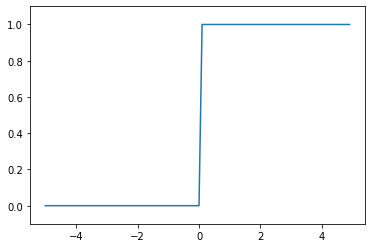

In [5]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    #numpy array x에 대해서 x > 0의 결과값을 int로 바꾸어 반환
    return np.array(x > 0, dtype=np.int32)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [6]:
def sigmoid(x):
    #시그모이드 활성화 함수 x의 값에 따라 0~1까지의 값을 가짐
    return 1 / (1 + np.exp(-x))

"""
numpy의 브로드 캐스트 기능으로 np.exp(-x)로 생성된
numpy array 전체에 1 + 및 1/가 순차적으로 이루어진다.
"""

'\nnumpy의 브로드 캐스트 기능으로 np.exp(-x)로 생성된\nnumpy array 전체에 1 + 및 1/가 순차적으로 이루어진다.\n'

In [7]:
x = np.array([-5.0, 1.0, 2.0])
sigmoid(x)

array([0.00669285, 0.73105858, 0.88079708])

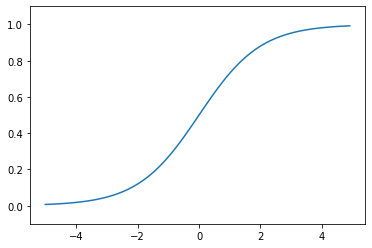

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1) # 0~ 1까지의 값을 가지기 때문에
plt.show()

계단함수보다 시그모이드 함수는 부드러운 곡선을 띄며 출력이 연속적으로 변화한다. 이러한 매끈함이 신경망 학습에서 중요한 역항을 하게 된다.

Q.그런데 시그모이드 함수는 임계값이 무엇일까?
여기에서는 대충 -5정도 되는 것 같은데 다른 값을 설정하는 것은 아닌 것 같다.
편향을 통해서 x의 값을 -5보다 작게 만들면 h(x)는 0에 가까워질 것이다.
따로 임계값을 설정하는지는 확인해 보아야 알 것 같다.

계단함수와 시그모이드 함수는 둘다 비선형 함수이다. 선형 함수를 사용하면 신경망의 층을 깊게하는 이유가 없기 때문.

이전에 7월 5일 세미나에서 선형과 비선형에 대한 얘기를 해주셨던 것 같음.
$h(x) = cx$가 활성화 함수라면
3개층 신경망은 $h(h(h(x))) = c^{3}x$이고 이는 $ax$와 같으므로 결국은 층을 많이 늘려도 하나의 층으로 표현이 가능함.

그래서 층을 쌓는 신경망의 이점을 갖고 싶다면 활성화 함수로는 비선형 함수를 사용해야 한다.


ReLU 함수
입력이 0을 넘으면 그대로 출력하고 0 이하면 0을 출력

책의 앞장에서는 시그모이드 함수를 사용하지만 후반부에는 주로 ReLU 함수를 사용한다.

In [9]:
def relu(x):
    return np.maximum(0, x)

In [10]:
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A)) #A의 차원 수
print(A.shape) #A의 모양
print(A.shape[0]) #A[0]의 모양

[1 2 3 4]
1
(4,)
4


In [11]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [12]:
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
print(A.shape, B.shape)
np.dot(A,B)

#당연하지만 np.dot(A, B) != np.dot(B, A)
#numpy의 행렬곱은 기본적인 행렬곱 규칙을 따름

(2, 2) (2, 2)


array([[19, 22],
       [43, 50]])

In [13]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([7,8])
print(A.shape, B.shape)
print(A, B)
print(np.dot(A,B))

#B는 1x2행렬인데 AxB에서 자동으로 2x1 행렬로 처리해 주는 듯?
#아니면 뭔가 코드에 오류가 있나?

(3, 2) (2,)
[[1 2]
 [3 4]
 [5 6]] [7 8]
[23 53 83]


위의 행렬곱을 잘 활용하면 아주 적은 코드만으로 신경망의 순방향 처리를 완성할 수 있다.

생각해보면 input도 weight 곱하는 것도 모두 행렬곱으로 구할 수 있을 것이다.

83p. 그림 3-15를 행렬로 어떻게 표현할 수 있을까?

input = np.array([x1, x2])
weights1 = np.array([w1, w3, w5], [w2, w4, w6])
weigths2 = np.array([we1, we4], [we2, we5],[we3, we6])
weights3 = np.array([wei1, wei3],[wei2, wei4])

output = np.dot(np.dot(np.dot(input, weights1), weights2), weights3)

bias는 어떻게 표현할까? input array에 1을 넣고 weights에 편향값을 줄 수 있는 행을 추가하면 될 것 같다.
input = np.array([x1, x2, b])
weights1 = np.array([w1, w3, w5], [w2, w4, w6], [bw1, bw2, bw3])
나머지 weights들도 똑같이 하면 될 듯?

3.3절까지 보고서 쓴 것이기 때문에 다를 수 있음

3.4절 보니까 편향은 따로 값을 주고 하는 듯
$A = WX + B$
위에 값에서 bw와 b만 따로 때면 될듯 함.

In [14]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)
print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


W와 B 그리고 A는 배열로 만들어서 접근하면 될 것 같다. X는 A[0] (C스타일에서는)
파이썬에서는? numpy를 이용해서 똑같이 3차원 배열을 만들자
W, B, A 모두

W = np.array([ [ [] ] ]) 
A['Floor']['values'] 각각의 값들이 해당 층의 입력값
W['Floor']['weights']['size_of_node'] size_of_node 해당 층의 노드의 갯수만큼, weights 해당 플로어의 입력값 개수만큼
B['Floor']['bias_for_node'] bias_for_node 노드의 개수만큼

A[0] = X
A[n] = np.dot(A[n-1], W[n-1]) + B[n-1]

A[0] = X일듯
파이썬에서는 각각의 플로어 마다 매트릭스를 다르게 설정해줄 수 있었는데, C++같은 경우에는 그런게 좀 힘드니까 클래스나 구조체를 만들어서 따로 설계해 주어야 할 것 같다.

In [15]:
def identity_function(x):
    return x

In [16]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


기계학습 문제의 두가지 유형
분류 : 데이터가 어느 클래스에 속하는지 찾는 문제
회귀 : 입력 데이터에서 연속적인 수치를 예측하는 문제

항등함수 : 입력과 출력이 항상 같음
소프트맥스 함수 : 입력값의 크기에 따라 확률로 바꾸어서 보여주는 것?

In [20]:
#softmax function
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [ ]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

근데 이걸 왜 사용하는 건지는 잘 모르겠다.
$$
y_k = {exp (a_k)\over \displaystyle\sum_{i=1}^{n}{exp(a_i)}} 
$$

현실에서는 해당 수식을 사용하는 것이 문제가 없지만, 컴퓨터에서는 수에 제한이 있기 때문에 오버플로가 나타날 수 있다. 그래서 C라는 임의의 정수를 분자 분모에 곱해서 오버플로를 막아준다.

$$
C^{\log_{e}e} = e^{\log_{e}C}\\
y = {C exp (a_k)\over C\displaystyle\sum_{i=1}^{n}{exp(a_i)}}\\
y = {exp (a_k+\log_{e}C)\over \displaystyle\sum_{i=1}^{n}{exp(a_i+\log_{e}C)}}\\
$$
위 식에서 $\log_{e}C$를 $C'$으로 사용한다.
이 때 보통은 입력 신호 중 최댓값을 상수 $C'$로 사용하는 것이 일반적임.

In [21]:
a = np.array([1010, 1000, 990])
print(np.exp(a / np.sum(np.exp(a))))


[1. 1. 1.]


C:\Users\rkwoa\AppData\Local\Temp\ipykernel_20820\4198790797.py:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a / np.sum(np.exp(a))))


In [22]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [23]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [24]:
def softmax(a):
    """
    overflow를 해결한 softmax 함수
    """
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [25]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


당연한 말이겠지만 소프트맥스 함수의 출력값들의 합은 1이다.
이 성질 때문에 소프트맥스 함수의 출력값을 확률로 해석할 수 있다.

신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식.
그래서 결과적으로 출력층의 소프트맥스 함수를 생략해도 된다.
지수함수 계산에 드는 자원 낭비를 줄이기 위해 현업에서는 생략하기도 한다.

추론 단계에서는 소프트맥스 함수를 생략하는 것이 일반적이나 신경망을 학습시킬 때에는 출력층에서 소프트맥스 함수를 사용한다. 그 이유는 4장에서...

In [2]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
#훈련 이미지, 훈련 레이블 . 시험 이미지, 시험 레이블
#flatten 1차원 배열로
#normalized 픽셀 값을 0~1로 정규화
#one-hot-label 원 핫 인코딩 : 정답은 1 아니면 0으로 저장
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image


def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)  # 5

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

img_show(img)


5
(784,)
(28, 28)


In [4]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p= np.argmax(y) # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


정규화 : 데이터를 특정 범위로 변환하는 처리 

전처리 : 신경망의 입력 데이터에 특정 변환을 가하는 것

우리는 입력 데이터를 전처리 하는 과정에서 정규화를 수행하였다.(normalize)

In [7]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [9]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: "+str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


이전에 유튜브에서 GPU의 작동원리에 대한 영상을 봤었는데 배치 처리하는 이유가 그것 때문인 것 같다.
